<a href="https://colab.research.google.com/github/abdelmonem808/Artificial-Intelligence-and-Machine-Vision/blob/main/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/model_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytesseract

import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import pytesseract as pt
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from glob import glob
from skimage import io
from shutil import copy
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
#!rm -r Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques

In [12]:
!git clone https://github.com/abdelmonem808/Artificial-Intelligence-and-Machine-Vision
path = '/content/plate-dataset'

%cd urldata #go to the directory where git clone says *Cloning into*

for subdir, dirs, files in os.walk(path):
  print(files)

Cloning into 'Artificial-Intelligence-and-Machine-Vision'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 124
Receiving objects: 100% (128/128), 21.93 MiB | 22.23 MiB/s, done.
Resolving deltas: 100% (57/57), done.
[Errno 2] No such file or directory: 'urldata #go to the directory where git clone says *Cloning into*'
/content
[]


In [8]:
from google.colab import drive
drive.mount('/content')

ValueError: ignored

In [ ]:
path = glob('/content/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/*.xml')
labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])
for filename in path:

    info = xet.parse(filename)
    root = info.getroot()
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)

    labels_dict['filepath'].append(filename)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

In [ ]:
df = pd.DataFrame(labels_dict)
df.to_csv('../labels.csv',index=False)
df.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/Vehicles-License-Plate-Detection-usin...,1093,1396,645,727


In [ ]:
filename = df['filepath'][0]
def getFilename(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = os.path.join('/content/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images',filename_image)
    return filepath_image
getFilename(filename)

'/content/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/image1.png'

In [ ]:
image_path = list(df['filepath'].apply(getFilename))
image_path[0:1]#random check

['/content/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/image1.png']


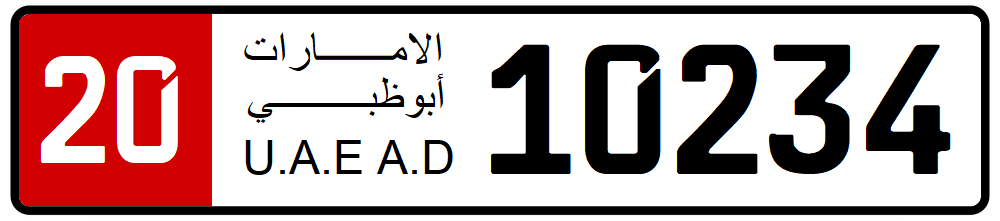

In [ ]:
file_path = image_path[0] #path of our image1.png
img = cv2.imread(file_path) #read the image
# xmin-1804/ymin-1734/xmax-2493/ymax-1882 
img = io.imread(file_path) #Read the image
fig = px.imshow(img)
fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Plate - image1.png with bounding box')
fig.add_shape(type='rect',x0=1804, x1=2493, y0=1734, y1=1882, xref='x', yref='y',line_color='cyan')

In [ ]:
#Targeting all our values in array selecting all columns
labels = df.iloc[:,1:].values
data = []
output = []
for ind in range(len(image_path)):
    image = image_path[ind]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # Prepprocesing
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # Normalization
    # Normalization to labels
    xmin,xmax,ymin,ymax = labels[ind]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) # Normalized output
    # Append
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [ ]:
# Convert data to array
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [ ]:
# Split the data into training and testing set using sklearn.
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

ValueError: ignored